In this project, we device a code to visually display the geographic distribution of the air pollution dataset from Open AQ.
The raw dataset can be obtained at the following link.
https://www.kaggle.com/open-aq/openaq

The BigQuery database has been converted to csv file with the following code on Kaggle Kernel.

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# # Any results you write to the current directory are saved as output.

# from google.cloud import bigquery
# from bq_helper import BigQueryHelper

In [2]:
# QUERY = """
#         SELECT *
#         FROM `bigquery-public-data.openaq.global_air_quality`
#         """

# bq_assistant = BigQueryHelper('bigquery-public-data', 'openaq')
# df = bq_assistant.query_to_pandas(QUERY)

In [3]:
# print(df.head())
# print(df.shape)
# df.to_csv('OpenAQ.csv', index=False)

In [4]:
import pandas as pd
import cartopy
import matplotlib.pyplot as plt

GitHub import

In [5]:
# url = 'https://raw.githubusercontent.com/songhaoli/OpenAQ/master/OpenAQ.csv?token=AGNZNKDRLFS56U5ARLN6ZDC447YB4'
# open_aq = pd.read_csv(url)

Manual Import

In [6]:
# from google.colab import files
# uploaded = files.upload()

# import io
# open_aq = pd.read_csv(io.BytesIO(uploaded['OpenAQ.csv']))
# # Dataset is now stored in a Pandas Dataframe

Fast Import if the file is in the same directory.

In [7]:
open_aq = pd.read_csv('OpenAQ.csv')

In [8]:
print(open_aq.columns)
print(open_aq['pollutant'].unique())

Index(['location', 'city', 'country', 'pollutant', 'value', 'timestamp',
       'unit', 'source_name', 'latitude', 'longitude',
       'averaged_over_in_hours'],
      dtype='object')
['co' 'no2' 'o3' 'pm25' 'so2' 'pm10' 'bc']


Define a function to extract the readings of the chosen pollutant.

In [9]:
def extract_pollutant(pollutant):
    df = open_aq[open_aq['pollutant']==pollutant]
    
    # sort by pollutant reading.
    df = df.sort_values('value', ascending=False)
    
    # location is not very useful.
    df = df.drop('location',axis=1)
    
    # drop duplicated readings from the same city.
    df = df.drop_duplicates(subset='city')
    
    # drop readings that is zero or negative.
    df = df[df['value']>0]
    return df

In [10]:
pm25 = extract_pollutant('pm25')

Extract the reading from a particular country.

In [11]:
def extract_country(df, country):
    return df[df['country']==country]

In [12]:
pm25_cn = extract_country(pm25, 'CN')

Plot the cities in the dataframe df with the readings higher than the limit.

In [13]:
def plot_map(df, limit=0):
    df = df[df['value']>limit]
    
    plt_list = list()
    for index, row in df.iterrows():
        # i = row['longitude'],row['latitude'],round(row['value'])
        # i = row['longitude'],row['latitude'],row['city']
        i = row['longitude'],row['latitude'],'{}: {}'.format(row['city'],round(row['value']))
        plt_list.append(i)
    
    ax = plt.figure(figsize=(10,15))
    ax = plt.axes(projection=cartopy.crs.PlateCarree())
    
    for i in plt_list:
        ax.text(i[0], i[1], i[2], fontsize=10)
        ax.plot(i[0], i[1], marker='o', markersize=7.0, markeredgewidth=2.5,
                markerfacecolor='black', markeredgecolor='none')
    
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.RIVERS)

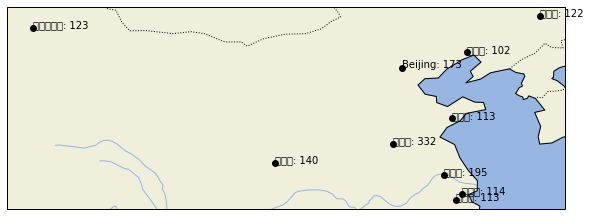

In [20]:
plot_map(pm25_cn, 100)

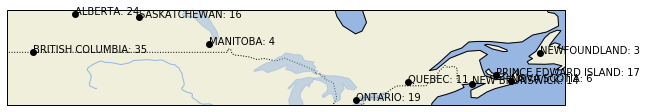

In [15]:
pm25_ca = extract_country(pm25, 'CA')
plot_map(pm25_ca)

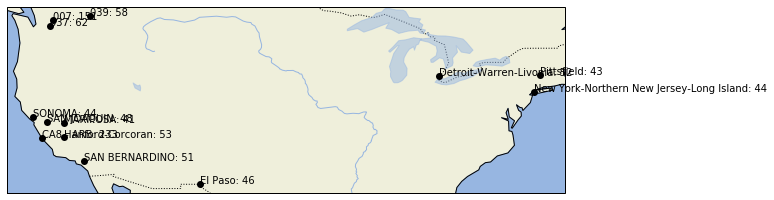

In [16]:
pm25_us = extract_country(pm25, 'US')
plot_map(pm25_us, 40)

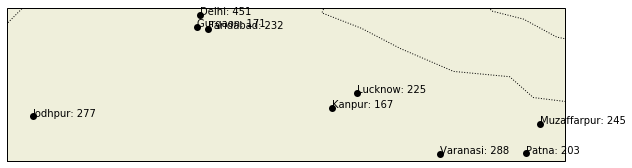

In [18]:
pm25_in = extract_country(pm25, 'IN')
plot_map(pm25_in, 150)

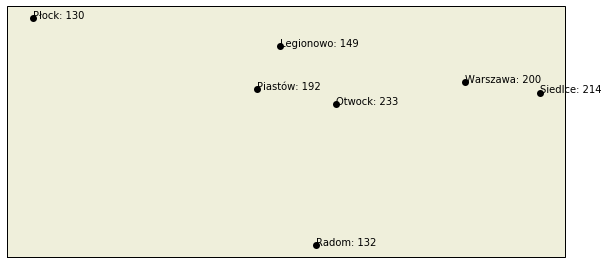

In [19]:
pm25_pl = extract_country(pm25, 'PL')
plot_map(pm25_pl, 100)